<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/04-Agrupamiento-kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento k-Means
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [16]:
# Paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [4]:
df = pd.read_csv('Auto_Sales_Cleaned.csv')
print("--- Muestra de los datos ---")
display(df.head())
print("\n--- Descripción de los datos ---")
display(df.describe())

# variables numéricas relevantes para el agrupamiento
columnas_numericas = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'DAYS_SINCE_LASTORDER']
# Inicializamos el escalador
scaler = StandardScaler()
# Transformamos los datos (Media 0, Desviación Estándar 1)
X_scaled = scaler.fit_transform(df[columnas_numericas])
# Mostramos una muestra de los datos ya escalados
df_scaled = pd.DataFrame(X_scaled, columns=columnas_numericas)
display(df_scaled.head())

--- Muestra de los datos ---


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,10121,34,81.35,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small
2,10134,41,94.74,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium
3,10145,45,83.26,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,10168,36,96.66,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,Burlingame,USA,Medium



--- Descripción de los datos ---


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,14082.800000,3562.000000,214.000000


,QUANTITYORDERED,PRICEEACH,SALES,MSRP,DAYS_SINCE_LASTORDER
0,-0.522831,-0.128440,-0.370956,-0.14191,-1.134233
1,-0.113010,-0.469823,-0.428119,-0.14191,-1.220910
2,0.604176,-0.151278,0.180185,-0.14191,-1.286834
3,1.013997,-0.424384,0.105325,-0.14191,-1.352757
4,0.091900,-0.105602,-0.039860,-0.14191,-1.429668


---
## <font color='264CC7'> Determinación del número de clusters </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de clústeres para un modelo K-Means utilizando el método del codo.
<ul>
  <li>Genera una gráfica que muestre la inercia frente al número de clústeres (k) en el rango de 1 a 10.</li>
  <li>Identifica visualmente el "codo" en la curva para seleccionar el número óptimo de clústeres.</li>
  <li>De manera intuitiva, explica por qué consideras ese punto como el codo y cómo influye en la calidad de los clústeres.</li>
</ul>
</div>


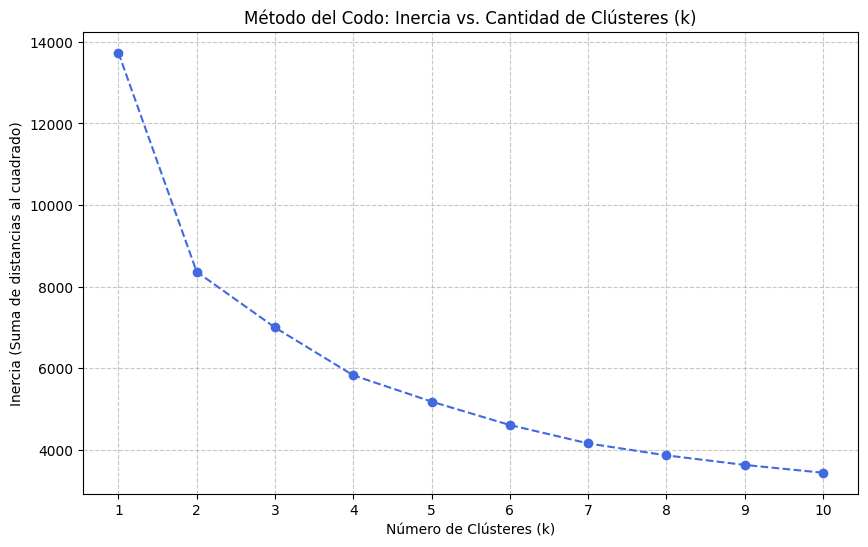

In [10]:
# rango de clusters
rango_k = range(1, 11)
inercias = []

#inercias cada k
for k in rango_k:
# random_state=42 para reproducibilidad, n_init=10 es el estándar
    modelo = KMeans(n_clusters=k, random_state=42, n_init=10)
    modelo.fit(X_scaled)
    inercias.append(modelo.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(rango_k, inercias, marker='o', linestyle='--', color='royalblue')
plt.title('Método del Codo: Inercia vs. Cantidad de Clústeres (k)')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia (Suma de distancias al cuadrado)')
plt.xticks(rango_k)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



Al parecer el codo que coge de mejor forma los clusters, seria de 4 clusters ya que la ganancia en cohecion se vuelve optima comparado a lo que seria tener mas grupos.
Y de acuerdo a la ultima pregutna ese punto lo escogo como cluster ya que de cierta forma estabiliza la visualizacion de mis datos garantizando en gran forma la cohesion y la simpliciddad


---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [13]:
# 1. Revisión de la Media
print("Promedios por Grupo")
#comportamiento "típico" de cada cluster
display(df.groupby('Cluster')[cols_analisis].mean().round(2))

# 2. Revisión de (Mínimo y Máximo)
print("\nValores Mínimos por Grupo")
display(df.groupby('Cluster')[cols_analisis].min())
print("\n Valores Máximos por Grupo ")
display(df.groupby('Cluster')[cols_analisis].max())

# 3. Visualización de Integrantes (Ejemplos Reales)
print("\nEjemplos de Pedidos por Grupo")

# Iteramos por cada grupo para mostrar 3 ejemplos representativos
for grupo in sorted(df['Cluster'].unique()):
    print(f"\n> Cluster {grupo} (Muestra de 3 pedidos):")
    cols_visualizar = ['ORDERNUMBER', 'SALES', 'QUANTITYORDERED', 'DAYS_SINCE_LASTORDER', 'DEALSIZE']
    display(df[df['Cluster'] == grupo][cols_visualizar].head(3))

Promedios por Grupo


,QUANTITYORDERED,PRICEEACH,SALES,MSRP,DAYS_SINCE_LASTORDER
Cluster,,,,,
0,29.32,122.61,3501.46,129.59,1100.38
1,27.78,72.03,1960.20,71.99,2191.93
2,43.51,81.99,3530.50,80.76,2211.97
3,43.12,156.89,6645.51,146.88,1111.38



Valores Mínimos por Grupo


,QUANTITYORDERED,PRICEEACH,SALES,MSRP,DAYS_SINCE_LASTORDER
Cluster,,,,,
0,6,32.47,785.64,44,76
1,6,28.29,482.13,33,139
2,29,26.88,1209.60,33,161
3,20,93.28,4514.92,33,42



 Valores Máximos por Grupo 


,QUANTITYORDERED,PRICEEACH,SALES,MSRP,DAYS_SINCE_LASTORDER
Cluster,,,,,
0,49,229.30,5377.40,214,2773
1,42,158.69,4102.56,140,3562
2,85,157.49,7543.75,148,3530
3,97,252.87,14082.80,214,2793



Ejemplos de Pedidos por Grupo

> Cluster 0 (Muestra de 3 pedidos):


,ORDERNUMBER,SALES,QUANTITYORDERED,DAYS_SINCE_LASTORDER,DEALSIZE
0,10107,2871.00,30,828,Small
1,10121,2765.90,34,757,Small
2,10134,3884.34,41,703,Medium



> Cluster 1 (Muestra de 3 pedidos):


,ORDERNUMBER,SALES,QUANTITYORDERED,DAYS_SINCE_LASTORDER,DEALSIZE
20,10375,733.11,21,139,Small
326,10122,2042.88,32,1081,Small
327,10135,1800.24,24,1027,Small



> Cluster 2 (Muestra de 3 pedidos):


,ORDERNUMBER,SALES,QUANTITYORDERED,DAYS_SINCE_LASTORDER,DEALSIZE
3,10145,3746.70,45,649,Medium
71,10388,2225.50,50,161,Small
325,10108,3485.82,39,1146,Medium



> Cluster 3 (Muestra de 3 pedidos):


,ORDERNUMBER,SALES,QUANTITYORDERED,DAYS_SINCE_LASTORDER,DEALSIZE
6,10188,5512.32,48,567,Medium
18,10341,7737.93,41,208,Large
23,10417,7516.08,66,42,Large


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

1. Cluster 0: Premium: Productos caros com pocas unidades
2. Cluster 1: Bajo valor: Valores mas bajos de todo
3. Cluster 2: Vulumen: Mucho producto pero barato
4. Cluster 3: Vip:Compran caros y de gran cantidad


---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D seleccionando dos variables que creas relevantes.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
</ul>
</div>

La verdad es que los grupos me parecen que estan excelentes ya que se puede diferencia de muy buena forma los 4 grupos hechos en un inciio es decir centroides, pero si hay pequeños rastros que se pueden mezclar los datos pero en general esta bien .

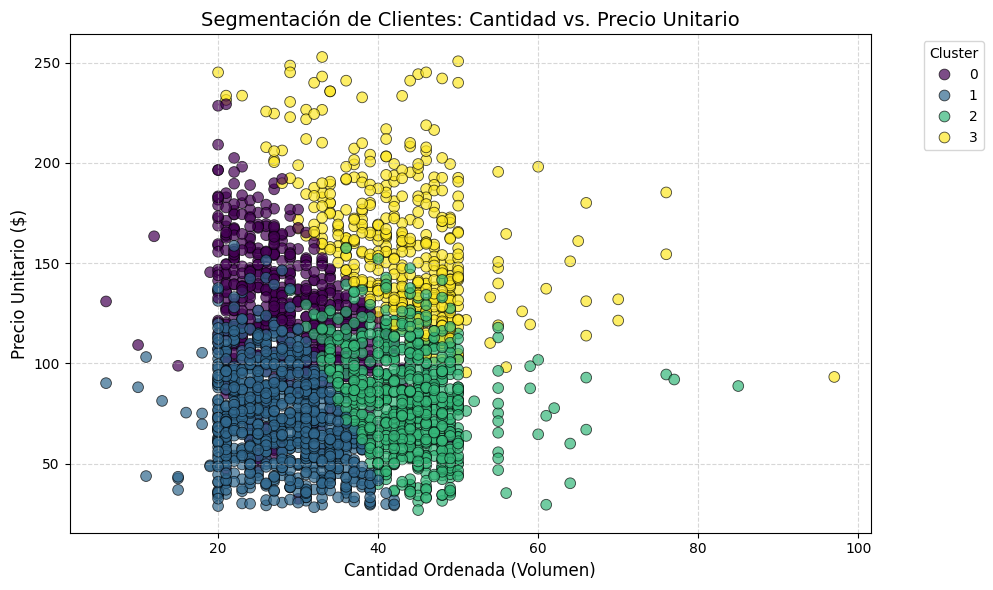

In [15]:
plt.figure(figsize=(10, 6))

# 2. Crear el Scatter Plot
sns.scatterplot(
    data=df,
    x='QUANTITYORDERED',
    y='PRICEEACH',
    hue='Cluster',
    palette='viridis',
    s=60,
    alpha=0.7,
    edgecolor='k'
)

# 3. Etiquetas y Títulos
plt.title('Segmentación de Clientes: Cantidad vs. Precio Unitario', fontsize=14)
plt.xlabel('Cantidad Ordenada (Volumen)', fontsize=12)
plt.ylabel('Precio Unitario ($)', fontsize=12)
plt.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D usando reducción de dimensionalidad diferente a PCA.
<ul>

  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [19]:
score = silhouette_score(X_scaled, df['Cluster'])
print(f"Coeficiente de Silueta Global: {score:.4f}")

Coeficiente de Silueta Global: 0.2541


 Osea al estar ignorando la mayoraia de los datos con un 60 % pues existe cierta sombra y en una variable que no la ocupamos pero con algo de solapamiento natural (común en datos de clientes).